<a href="https://colab.research.google.com/github/hadi-M/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1-decision-trees/HADI_MODARES_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.


- [ ] Do train/validate/test split with the Tanzania Waterpumps data.


In [0]:
import pandas as pd
import numpy as np

In [0]:
DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'

train_features_df = pd.read_csv(DATA_PATH+'waterpumps/train_features.csv')
# train_features.head()

In [0]:
train_labels_df = pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv')

In [0]:
train_merged_df = pd.merge(train_features_df, train_labels_df)

In [0]:
test_features_df = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')

In [0]:
sample_submission_df = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.


In [0]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
# !pip install category-encoders

In [0]:
from pandas_profiling import ProfileReport

# profile = ProfileReport(train_merged, minimal=True).to_notebook_iframe()
# profile

In [25]:
# X_train['longitude'][X_train['longitude'].astype("float").abs() < 10**-7] = np.nan
# X_train['latitude'][X_train['latitude'].astype("float").abs() < 10**-7] = np.nan

train_merged_df['longitude'][train_merged_df['longitude'].astype("float").abs() < 10**-7] = np.nan
train_merged_df['latitude'][train_merged_df['latitude'].astype("float").abs() < 10**-7] = np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
# The status_group column is the target
target = 'status_group'

# Get a dataframe with all train columns except the target & id
train_features = train_merged_df.drop(columns=[target, 'id'])

# Get a list of the numeric features
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get a series with the cardinality of the nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

train_features.select_dtypes(exclude='number').nunique()
# Get a list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine the lists 
features = numeric_features + categorical_features

In [0]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_merged_df, train_size=0.80, test_size=0.20,
                              stratify=train_merged_df['status_group'], random_state=42)

In [0]:
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test_features_df[features]

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(
    steps=[
        ("OneHot", ce.OneHotEncoder(use_cat_names=True)),
        ("Impute", SimpleImputer(strategy='mean')),
        ("tree", DecisionTreeClassifier(random_state=42))
    ]
)

pipeline.fit(X_train, y_train);

In [30]:
pipeline["tree"].tree_.max_depth

52

- [ ] Get your validation accuracy score.


In [31]:
print('Validation Accruacy', pipeline.score(X_val, y_val))

Validation Accruacy 0.7589225589225589


In [0]:
# exporting the submission for kaggle

# y_pred = pipeline.predict(X_test)
# final = sample_submission_df.copy()
# final["status_group"] = y_pred
# final[["id", "status_group"]].to_csv("sub1.csv", index=False)

- [ ] Get and plot your feature importances.


In [0]:
# running with different max_depths

# for i in range(1, 53):
#     pipeline = Pipeline(
#         steps=[
#             ("OneHot", ce.OneHotEncoder(use_cat_names=True)),
#             ("Impute", SimpleImputer(strategy='mean')),
#             ("tree", DecisionTreeClassifier(random_state=42, max_depth=i))
#         ]
#     )
#     pipeline.fit(X_train, y_train)
#     print('Validation Accruacy {}, :{}'.format(i, pipeline.score(X_val, y_val)))

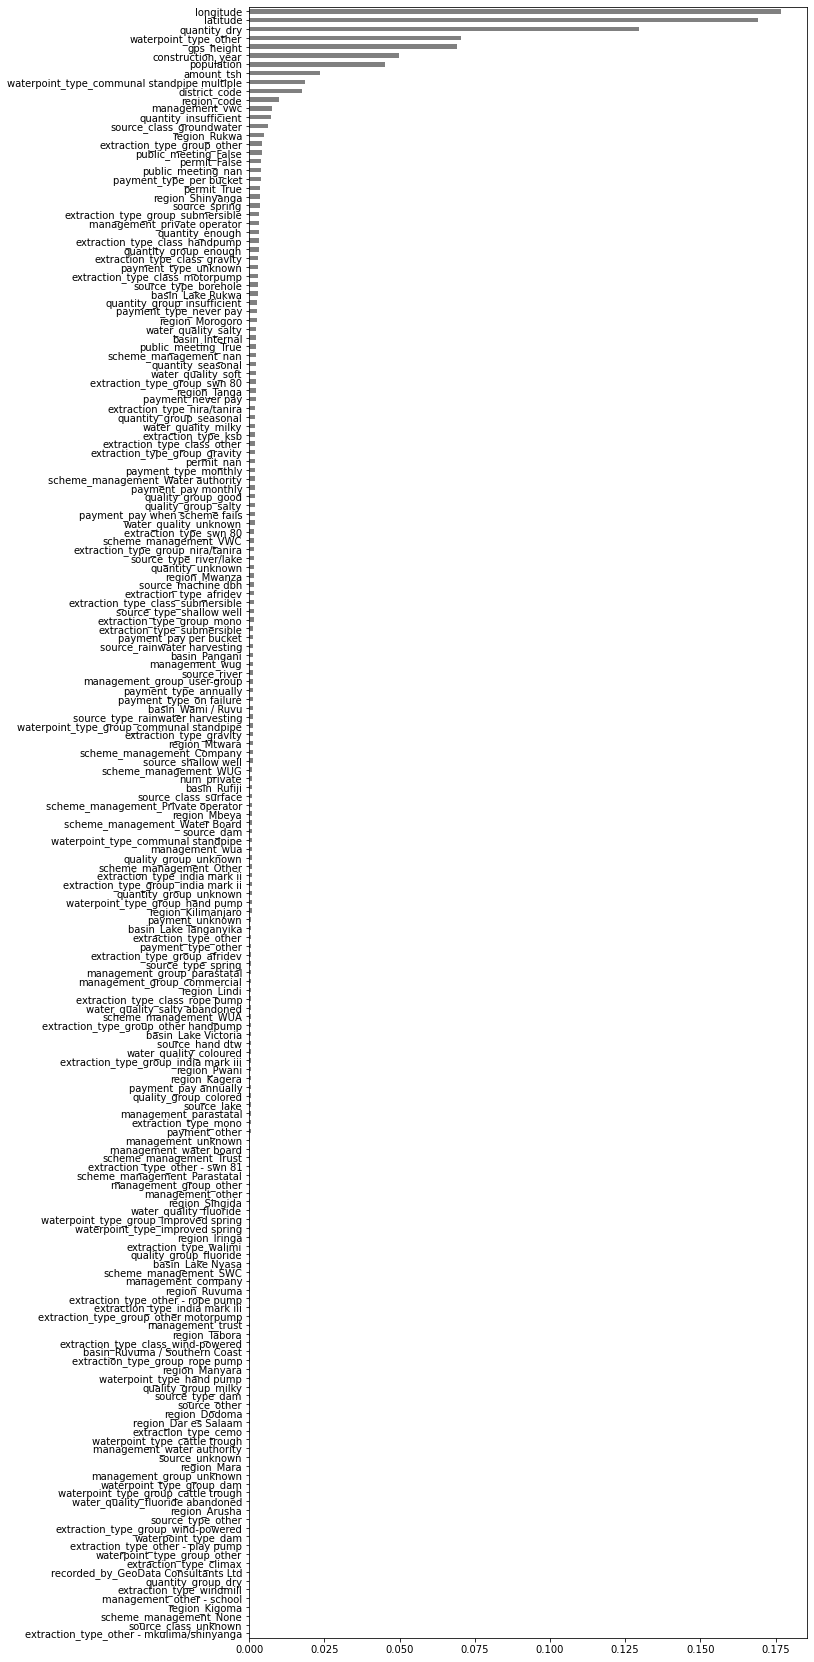

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from pdb import set_trace as st

model = pipeline.named_steps['tree']
encoder = pipeline.named_steps['OneHot']
encoded_columns = encoder.transform(X_val).columns

coefficients = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='grey');

- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)


In [0]:
test_features_df.head()

In [0]:
test_features_df[test_features_df["extraction_type"] != test_features_df["extraction_type_class"]]["extraction_type_class"].unique()


- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [0]:
# import sys

# # If you're on Colab:
# if 'google.colab' in sys.modules:
#     DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
#     !pip install category_encoders==2.*
#     !pip install pandas-profiling==2.*

# # If you're working locally:
# else:
#     DATA_PATH = '../data/'

In [0]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
#                  pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
# test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
# sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

# train.shape, test.shape

In [0]:
# # Check Pandas Profiling version
# import pandas_profiling
# pandas_profiling.__version__

In [0]:
# # Old code for Pandas Profiling version 2.3
# # It can be very slow with medium & large datasets.
# # These parameters will make it faster.

# # profile = train.profile_report(
# #     check_correlation_pearson=False,
# #     correlations={
# #         'pearson': False,
# #         'spearman': False,
# #         'kendall': False,
# #         'phi_k': False,
# #         'cramers': False,
# #         'recoded': False,
# #     },
# #     plot={'histogram': {'bayesian_blocks_bins': False}},
# # )
# #

# # New code for Pandas Profiling version 2.4
# from pandas_profiling import ProfileReport
# profile = ProfileReport(train, minimal=True).to_notebook_iframe()

# profile